# This notebook showcases the easiest ways to work with data in your `Dataset`.

## Also, refer to [03 - Creating a Dataset from Raw, DataFrame, GeoDataFrame.ipynb](https://github.com/derekeden/trackio/blob/main/notebooks/03%20-%20Creating%20a%20Dataset%20from%20Raw%2C%20DataFrame%2C%20GeoDataFrame.ipynb) and [05 - Opening an Existing Dataset.ipynb](https://github.com/derekeden/trackio/blob/main/notebooks/05%20-%20Opening%20an%20Existing%20Dataset.ipynb) for tips on how to create a `Dataset`.
___

In [1]:
import trackio as tio
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import pandas as pd

___
## Reading a specific agent

In [2]:
#create the Dataset
ds = tio.read(data_path='example00')

In [3]:
#get agent id
agent_id = ds.agents.index[0]

#get specific agent
agent = ds.get_agent(agent_id)

agent

___
## Reading a series of agents

In [4]:
#get agent ids
agent_ids = ds.agents.index[:100]

#get agents
agents = ds.get_agents(agent_ids, ncores=4)

len(agents), agents[0]

Getting agents: 100%|██████████| 100/100 [00:00<00:00, 49985.75it/s]


(100, <trackio.Agent.Agent at 0x1cae6669c90>)

___
## Reading a specific track

In [5]:
#get track id
track_id = ds.tracks.index[0]

#get specific agent
track = ds.get_track(track_id)

track.head(5)

,Time,X,Y,Coursing,Speed,Code16,Polygon,Code100,Code101,Code102,Code103,Code104,Code105,Code106,Code107,Which Polygon?
0,2021-01-01 10:07:00,-8.234336e+06,4.971735e+06,184.250000,5.300000,False,104,False,False,False,False,True,False,False,False,104
1,2021-01-01 10:08:00,-8.234354e+06,4.971522e+06,185.000000,5.300000,False,104,False,False,False,False,True,False,False,False,104
2,2021-01-01 10:09:00,-8.234379e+06,4.971304e+06,187.662319,5.300000,False,104,False,False,False,False,True,False,False,False,104
3,2021-01-01 10:10:00,-8.234414e+06,4.971087e+06,189.434783,5.300000,False,104,False,False,False,False,True,False,False,False,104
4,2021-01-01 10:11:00,-8.234452e+06,4.970873e+06,191.554286,5.251429,False,104,False,False,False,False,True,False,False,False,104


___
## Reading a series of tracks

In [6]:
#get track ids
track_ids = ds.tracks.index[:100]

#get agents
tracks = ds.get_tracks(track_ids, ncores=4)

len(tracks), tracks[0].head(5)

Getting tracks: 100%|██████████| 100/100 [00:00<00:00, 66682.10it/s]


(100,
                  Time             X             Y    Coursing     Speed  \
 0 2021-01-01 10:07:00 -8.234336e+06  4.971735e+06  184.250000  5.300000   
 1 2021-01-01 10:08:00 -8.234354e+06  4.971522e+06  185.000000  5.300000   
 2 2021-01-01 10:09:00 -8.234379e+06  4.971304e+06  187.662319  5.300000   
 3 2021-01-01 10:10:00 -8.234414e+06  4.971087e+06  189.434783  5.300000   
 4 2021-01-01 10:11:00 -8.234452e+06  4.970873e+06  191.554286  5.251429   
 
    Code16  Polygon  Code100  Code101  Code102  Code103  Code104  Code105  \
 0   False      104    False    False    False    False     True    False   
 1   False      104    False    False    False    False     True    False   
 2   False      104    False    False    False    False     True    False   
 3   False      104    False    False    False    False     True    False   
 4   False      104    False    False    False    False     True    False   
 
    Code106  Code107  Which Polygon?  
 0    False    False             

___
## Converting to DataFrame

In [7]:
#convert to dataframe
df = ds.to_df(tracks=track_ids,
              ncores=4)

df.head(5)

Converting tracks to DataFrame: 100%|██████████| 100/100 [00:02<00:00, 46.63it/s]


,Time,X,Y,Coursing,Speed,Code16,Polygon,Code100,Code101,Code102,...,Code106,Code107,Which Polygon?,Track ID,MMSI,Agent ID,Radius of Curvature,Characteristic,Sinuosity,Turning Rate
Vessel_338073000_T0_P0,2021-01-01 00:18:00,-8.244227e+06,4.957488e+06,38.266667,0.241667,False,0,False,False,False,...,False,False,0,Vessel_338073000_T0,338073000,Vessel_338073000,NaN,NaN,NaN,NaN
Vessel_338073000_T0_P1,2021-01-01 00:19:00,-8.244227e+06,4.957493e+06,152.904348,0.200000,False,0,False,False,False,...,False,False,0,Vessel_338073000_T0,338073000,Vessel_338073000,NaN,NaN,NaN,NaN
Vessel_338073000_T0_P2,2021-01-01 00:20:00,-8.244232e+06,4.957497e+06,284.087324,0.288732,False,0,False,False,False,...,False,False,0,Vessel_338073000_T0,338073000,Vessel_338073000,NaN,NaN,NaN,NaN
Vessel_338073000_T0_P3,2021-01-01 00:21:00,-8.244253e+06,4.957495e+06,260.765217,0.500000,False,0,False,False,False,...,False,False,0,Vessel_338073000_T0,338073000,Vessel_338073000,NaN,NaN,NaN,NaN
Vessel_338073000_T0_P4,2021-01-01 00:22:00,-8.244273e+06,4.957492e+06,258.262857,0.500000,False,0,False,False,False,...,False,False,0,Vessel_338073000_T0,338073000,Vessel_338073000,NaN,NaN,NaN,NaN


___
## Converting to GeoDataFrame

This method has two ways of returning output. It can either return 1 LineString for each track, or N LineStrings for each track with N segments.

Additionally, you can specify a `code` integer value to return only portions of tracks with that `code` value as `True`. For the first output method, this would return 1 MultiLineString.

Converting tracks to GeoDataFrame: 100%|██████████| 100/100 [00:02<00:00, 46.51it/s]


<Axes: >

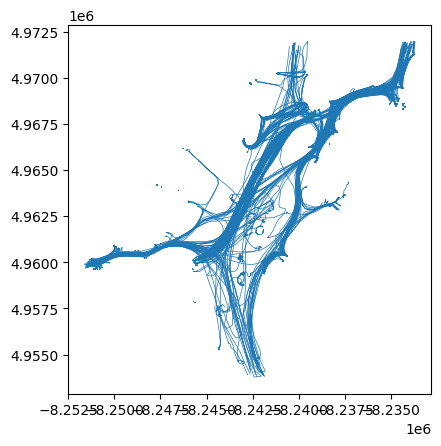

In [8]:
#convert to gdf
gdf1 = ds.to_gdf(tracks=track_ids, 
                 ncores=4)

gdf1.plot(linewidth=0.5)

In [9]:
gdf1.head(5)

,MMSI,Agent ID,npoints,ntracks,Xmin,Xmax,Ymin,Ymax,Start Time,End Time,...,Effective Distance,Min Temporal Resolution,Mean Temporal Resolution,Max Temporal Resolution,Min Spatial Resolution,Mean Spatial Resolution,Max Spatial Resolution,Sinuosity,Track ID,geometry
Vessel_338073000_T0,338073000,Vessel_338073000,61,1,-8.251045e+06,-8.243744e+06,4.957291e+06,4.961003e+06,2021-01-01 00:18:00,2021-01-01 01:18:00,...,7267.361552,60,60.0,60,3.057357,188.784864,427.968899,1.558625,Vessel_338073000_T0,"LINESTRING (-8244226.588 4957487.998, -8244226..."
Vessel_338093826_T0,338093826,Vessel_338093826,109,1,-8.243021e+06,-8.242202e+06,4.954217e+06,4.966368e+06,2021-01-01 22:11:00,2021-01-01 23:59:00,...,11790.231395,60,60.0,60,0.000000,121.400975,291.943125,1.112048,Vessel_338093826_T0,"LINESTRING (-8242202.243 4954217.103, -8242285..."
Vessel_338329000_T0,338329000,Vessel_338329000,884,1,-8.251434e+06,-8.234247e+06,4.959921e+06,4.971858e+06,2021-01-01 00:18:00,2021-01-01 15:01:00,...,14515.407171,60,60.0,60,0.000000,39.751094,472.760313,2.418135,Vessel_338329000_T0,"LINESTRING (-8245972.356 4963302.130, -8245972..."
Vessel_338357486_T0,338357486,Vessel_338357486,431,1,-8.242775e+06,-8.233872e+06,4.966154e+06,4.971980e+06,2021-01-01 00:18:00,2021-01-01 07:28:00,...,4.671273,60,60.0,60,0.000000,78.782889,390.232308,7252.121429,Vessel_338357486_T0,"LINESTRING (-8242338.888 4969905.441, -8242338..."
Vessel_338458000_T0,338458000,Vessel_338458000,250,1,-8.251272e+06,-8.233932e+06,4.959500e+06,4.971703e+06,2021-01-01 17:30:00,2021-01-01 21:39:00,...,20964.200826,60,60.0,60,3.157149,111.892757,331.181587,1.328994,Vessel_338458000_T0,"LINESTRING (-8251271.577 4959919.936, -8251054..."


___
## Now, do it with the track segments. Be careful, this can take a long time and result in a huge GeoDataFrame if your data has many points. Be selective of tracks you are converting to segments.

In [10]:
#convert to gdf, segment return mode
gdf2 = ds.to_gdf(tracks=track_ids, 
                 ncores=4,
                 segments=True)

Converting track segments to GeoDataFrame: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


<Axes: >

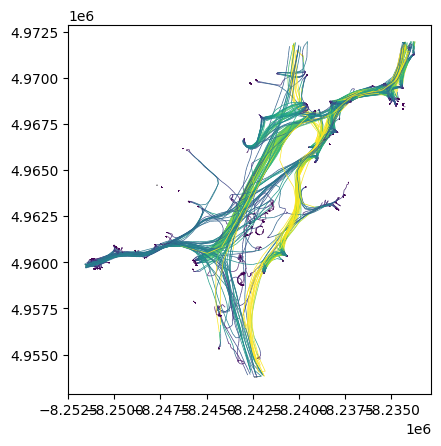

In [11]:
#plot the segments
gdf2.plot(linewidth=0.5, column='Speed', vmin=0, vmax=20)

In [12]:
gdf2.head(5)

,MMSI,Agent ID,npoints,ntracks,Xmin,Xmax,Ymin,Ymax,Start Time,End Time,...,Sinuosity,Coursing,Speed,Polygon,Which Polygon?,Segment ID,geometry,Radius of Curvature,Characteristic,Turning Rate
Vessel_338073000_T0_S0,338073000,Vessel_338073000,2,1,-8.244227e+06,-8.244227e+06,4.957488e+06,4.957493e+06,2021-01-01 00:18:00,2021-01-01 00:19:00,...,1.0,95.585507,0.220833,0,0,Vessel_338073000_T0_S0,"LINESTRING (-8244226.588 4957487.998, -8244226...",NaN,NaN,NaN
Vessel_338073000_T0_S1,338073000,Vessel_338073000,2,1,-8.244232e+06,-8.244227e+06,4.957493e+06,4.957497e+06,2021-01-01 00:19:00,2021-01-01 00:20:00,...,1.0,218.495836,0.244366,0,0,Vessel_338073000_T0_S1,"LINESTRING (-8244226.528 4957493.047, -8244232...",NaN,NaN,NaN
Vessel_338073000_T0_S2,338073000,Vessel_338073000,2,1,-8.244253e+06,-8.244232e+06,4.957495e+06,4.957497e+06,2021-01-01 00:20:00,2021-01-01 00:21:00,...,1.0,272.426271,0.394366,0,0,Vessel_338073000_T0_S2,"LINESTRING (-8244232.213 4957497.153, -8244253...",NaN,NaN,NaN
Vessel_338073000_T0_S3,338073000,Vessel_338073000,2,1,-8.244273e+06,-8.244253e+06,4.957492e+06,4.957495e+06,2021-01-01 00:21:00,2021-01-01 00:22:00,...,1.0,259.514037,0.500000,0,0,Vessel_338073000_T0_S3,"LINESTRING (-8244253.470 4957494.662, -8244272...",NaN,NaN,NaN
Vessel_338073000_T0_S4,338073000,Vessel_338073000,2,1,-8.244293e+06,-8.244273e+06,4.957487e+06,4.957492e+06,2021-01-01 00:22:00,2021-01-01 00:23:00,...,1.0,260.148571,0.500000,0,0,Vessel_338073000_T0_S4,"LINESTRING (-8244272.842 4957492.070, -8244292...",NaN,NaN,NaN


___
## Rasterizing Track Counts

This method uses the GDAL rasterize function to burn track counts into background rasters. A track is counted in a given pixel if any part of that track touches the pixel. The same track crossing over the same pixel can result in multiple counts.

In [13]:
#save the gdf to use it for rasterizing
gdf_file = 'files/gdf.gpkg'
gdf2[['Speed','geometry']].to_file(gdf_file)

In [14]:
#define blank raster output file
blank_file = 'files/blank.tif'

#get bounds of dataset
x0, y0, x1, y1 = ds.agents.total_bounds

#create blank zero raster
tio.create_blank_raster(blank_file,
                        ds.meta['CRS'],
                        grid={'x0': x0,
                              'y0': y0,
                              'nx': int((x1-x0)/100),
                              'ny': int((y1-y0)/100),
                              'dx': 100,
                              'dy': 100})

Raster created and saved to files/blank.tif!


In [15]:
#define output file
count_file = 'files/track_counts.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, count_file)

Track Counts written to c:\code\trackio\notebooks\files\track_counts.tif


<Axes: >

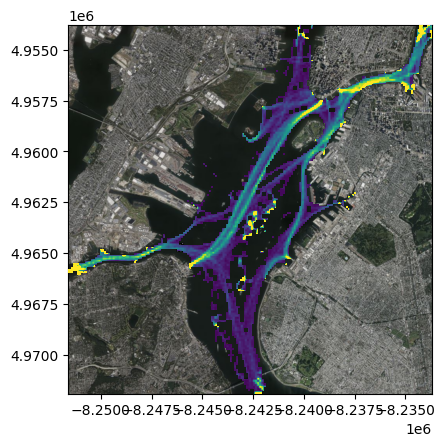

In [16]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
count = rio.open(count_file, 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(count, ax=ax, zorder=10, vmin=0, vmax=50, origin='lower')

___
## Rasterizing Track Attributes

This can be used to rasterize dynamic attributes (i.e. Speed, Duration, etc.) along tracks into a background raster. This can be useful for making spatial maps of average values, like mean speed or the average dimension of vessels passing over a given area. Or, it can be used to approximate the amount of time spent in each pixel.

In [17]:
#define output file
speed_file = 'files/track_speeds.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, speed_file, attribute='Speed')

Track Speed written to c:\code\trackio\notebooks\files\track_speeds.tif


In [18]:
#make a mean speed raster
count = rio.open(count_file, 'r')
speed = rio.open(speed_file, 'r')
with rio.open('files/mean_speed.tif', 'w', **count.profile) as f:
    f.write(speed.read(1)/count.read(1), 1)

<Axes: >

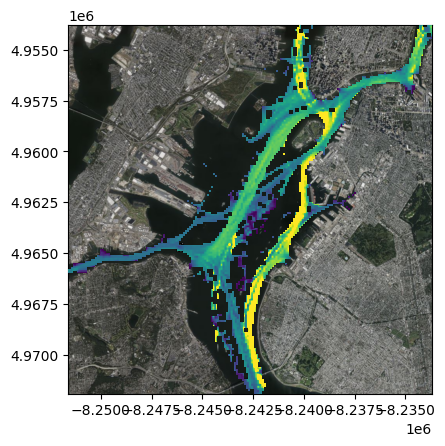

In [19]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
mean_speed = rio.open('files/mean_speed.tif', 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(mean_speed, ax=ax, zorder=10, vmin=0, vmax=20, origin='lower')

___
## Converting to Dask Bag

This method is used to convert the `Dataset` to a dask bag. Each element in the bag is a `trackio.Agent` object from the `Datset`.

This allows you to do whatever operations you want on the data, while leveraging Dask's parallel optimization capabilities. It's great for extending custom functionality.

In [20]:
#convert to dask bag
bag = ds.to_dask_bag()

In [23]:
#calculate max speed at each track
def grab_max_track_speed(agent):
    for tid in agent.tracks.keys():
        track = agent.tracks[tid]
        track_id = agent.agent_meta['Tracks'][tid]['Track ID']
        max_speed = track['Speed'].max()
    return track_id, max_speed

results = bag.map(grab_max_track_speed).compute()

pd.DataFrame(results)

,0,1
0,Vessel_248290000_T0,12.708571
1,Vessel_309987000_T0,5.078873
2,Vessel_338073000_T0,11.287324
3,Vessel_338093826_T0,7.200000
4,Vessel_338295000_T0,6.800000
...,...,...
158,Vessel_566855000_T0,6.743662
159,Vessel_636013689_T0,9.989855
160,Vessel_636015050_T0,0.200000
161,Vessel_636015514_T0,0.000000
